In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

### ClassWork

In [ ]:
img = cv.imread("assets/j.png", 0)

In [ ]:
plt.imshow(img, cmap="grey")

In [ ]:
kernel = np.ones((5, 5), np.uint8)
dilation = cv.dilate(img, kernel, iterations=1)

In [ ]:
kernel

In [ ]:
plt.imshow(dilation, cmap="grey")

In [ ]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))
erosion = cv.erode(img, kernel, iterations=1)
plt.imshow(erosion, cmap="grey")

In [ ]:
img = cv.imread("assets/j_stars.png", 0)
plt.imshow(img, cmap="grey")

In [ ]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (17, 17))

erosion = cv.erode(img, kernel, iterations=1)
plt.imshow(erosion, cmap="grey")

In [ ]:
dilation = cv.dilate(erosion, kernel, iterations=1)
plt.imshow(dilation, cmap="grey")

### HomeWork

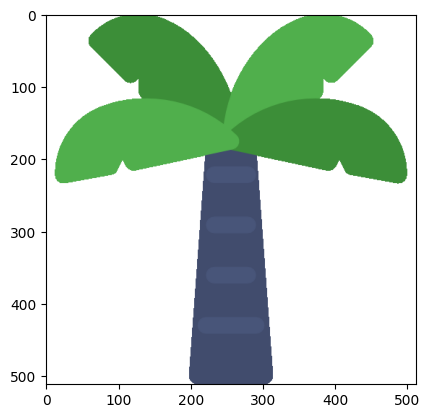

In [2]:
palm_im_path = os.path.join(
    os.getcwd(),
    'palm.png'
)
img = cv.imread(palm_im_path)
plt.imshow(img)

3


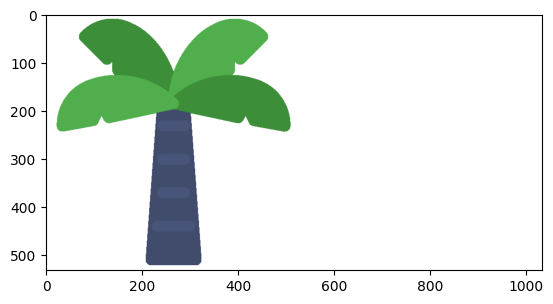

In [3]:
height,width,channels = img.shape
print(img.ndim)  
img_padded = cv.copyMakeBorder(img, 10,10,10,width, borderType=cv.BORDER_CONSTANT, value=(255,255,255,0)) 
cv.imwrite('palm_padded.png',img_padded)
plt.imshow(img_padded)

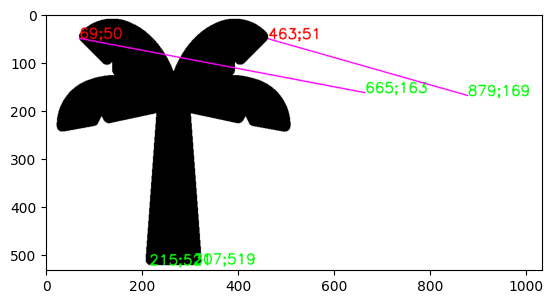

In [4]:
pts1, pts2 = [],[]
img_black = img_padded.copy()
img_black[img_black < 200] = 0

img_black_paint = img_black[:,:,:]

def click_event_make_perspective_points(event, x, y, flags, params): 
    # checking for left mouse clicks 
    if event == cv.EVENT_LBUTTONDOWN: 
        assert len(pts1) == len(pts2), 'You have already clicked left button'
        font = cv.FONT_HERSHEY_SIMPLEX 
        cv.putText(
            img_black_paint, 
            str(x) + ';' + str(y), 
            (x,y), font,
            1, (255, 0, 0), 2) 
        cv.imshow('image', img_black_paint) 
        pts1.append([x,y])
  
    # checking for right mouse clicks      
    if event==cv.EVENT_RBUTTONDOWN: 
        assert len(pts1) == len(pts2) + 1, 'You must click right button now!'
        x0,y0 = pts1[-1] 
        font = cv.FONT_HERSHEY_SIMPLEX  
        cv.putText(
            img_black_paint, 
            str(x) + ';' + str(y), 
            (x,y), font,
            1, (0, 255, 0), 2) 
        cv.line(img_black_paint, (x0, y0), (x, y), (255, 0, 255), thickness=2)
        cv.imshow('image', img_black_paint) 
        pts2.append([x,y])
 
cv.imshow('image', img_black_paint)  
cv.setMouseCallback('image', click_event_make_perspective_points) 
cv.waitKey(0) 
cv.destroyAllWindows()
plt.imshow(img_black_paint)

(532, 1034, 3)


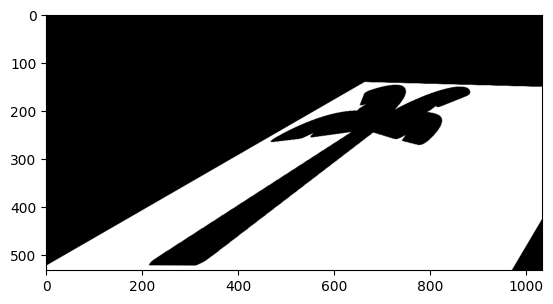

In [5]:
img_shadow = img_padded.copy(); img_shadow[img_shadow < 200] = 0
img_shadow = cv.cvtColor(img_shadow, cv.COLOR_BGR2GRAY) 
print(img_black.shape)
height, width = img_shadow.shape

WHITE = (255, 0, 0) 

M = cv.getPerspectiveTransform(np.float32(pts1), np.float32(pts2))
img_shadow_res = cv.warpPerspective(img_shadow, M, (width, height))

cv.imwrite('palm_padded_perspective.png',img_shadow_res)
plt.imshow(img_shadow_res, cmap='gray')

True

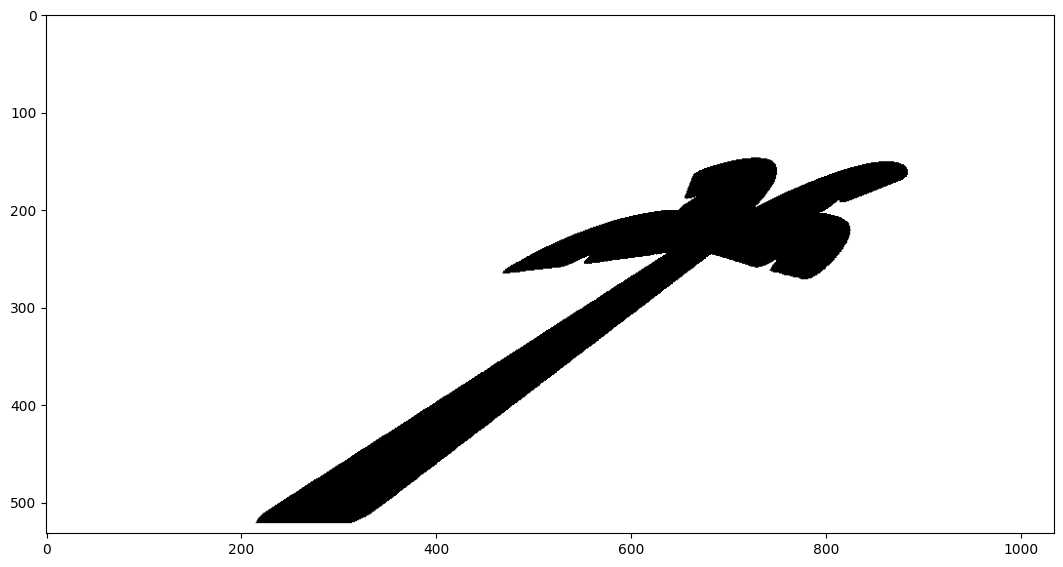

In [6]:
x_in, y_in = -1, -1
point_selected = False 
def click_event_make_point_in_contour(event, x, y, flags, params):
    global x_in, y_in, point_selected
    if event == cv.EVENT_LBUTTONDOWN:
        x_in, y_in = x, y
        point_selected = True
        cv.destroyWindow('image')  # Закрыть окно после клика 
img = cv.imread('palm_padded_perspective.png')  # Замените 'your_image.jpg' на путь к вашему изображению 
img_inverted = cv.bitwise_not(img)

cv.namedWindow('image')
cv.setMouseCallback('image', click_event_make_point_in_contour)

while True:
    cv.imshow('image', img_inverted)
    key = cv.waitKey(1) & 0xFF
    if point_selected:
        break
    if key == ord('q'):
        break

gray = cv.cvtColor(img_inverted, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 200, 255, cv.THRESH_BINARY)
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

color = [255, 255, 255]
selected_contour = None

for cont in contours:
    if cv.pointPolygonTest(cont, (x_in, y_in), False) >= 0:
        selected_contour = cont
        break

mask = np.zeros_like(gray)
if selected_contour is not None:
    cv.drawContours(mask, [selected_contour], -1, (255, 255, 255), thickness=cv.FILLED)

inverse_mask = cv.bitwise_not(mask)
darkened_image = cv.bitwise_and(img_inverted, img_inverted, mask=inverse_mask)

if inverse_mask.shape[:2] != darkened_image.shape[:2]:
    inverse_mask = cv.resize(inverse_mask, (darkened_image.shape[1], darkened_image.shape[0]))

result = cv.bitwise_not(cv.bitwise_or(darkened_image, img_inverted, mask=mask))

plt.figure(figsize=(13,13))
plt.imshow(result, cmap='gray') 
cv.imwrite('palm_padded_shadow.png',result)

56


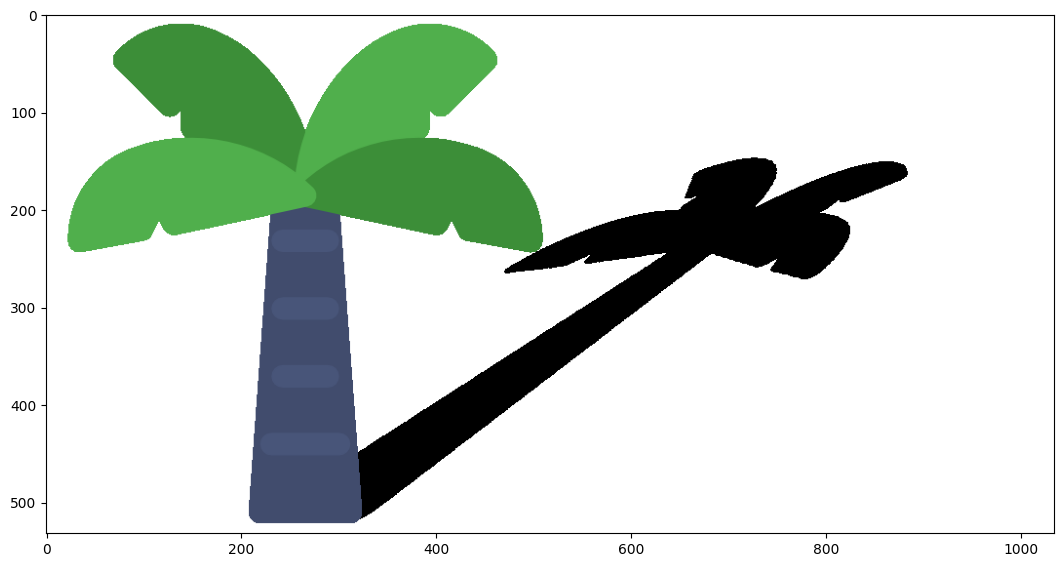

In [28]:
shadow_img = cv.imread("palm_padded_shadow.png")
palm_img = cv.imread("palm_padded.png")

merged_image = palm_img.copy()
shadow_cond = np.logical_and(shadow_img == 0, palm_img == 255)
merged_image[shadow_cond] = 0

print(np.min(palm_img))
plt.figure(figsize=(13, 13))
plt.imshow(merged_image)